Analysis of Stack Exchange DSSE
* Mostly technical questions are welcome on this site
* Home is subdivided into categories
* Active and Hot questions are probably the most popular content to provide
* Each post has upvotes, answers, views, tags

Tables that appear most promising to finding the most popular content:
* Tags
* Posts


In [1]:
import pandas as pd

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


* How many missing values are there in each column:
    Only FavoriteCount has missing values - about 7432
* We can use fillna to change the missing values to 0
* The types of each column look correct except FavoriteCount which needs to be 'int64'
* All tags could be added as columns and then each set with a value of 1 if tagged or 0 if not tagged in the Tags column

In [3]:
questions = questions.fillna(value=0)
questions.loc[:,"FavoriteCount"] = questions["FavoriteCount"].astype('int')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [4]:
questions.loc[:,"Tags"] = questions["Tags"].str.replace("><",",")
questions.loc[:,"Tags"] = questions["Tags"].str.replace("<","")
questions.loc[:,"Tags"] = questions["Tags"].str.replace(">","")
questions["Tags"] = questions["Tags"].str.split(',')

In [5]:
tags = {}
def count_tags(taglist):
    for tag in taglist:
        if tag in tags:
            tags[tag] += 1
        else:
            tags[tag] = 1

views = {}
def count_views(viewcount, tags):
    for tag in tags:
        if tag in views:
            views[tag] += viewcount
        else:
            views[tag] = viewcount

questions["Tags"].apply(count_tags)
tag_data = tags
for row in questions.itertuples(index=False):
    #print(row)
    #print(type(row[4]))
    tags = row[4]
    viewcount = row[3]
    count_views(viewcount, tags)
views

{'.net': 438,
 '3d-object-detection': 7,
 '3d-reconstruction': 1129,
 'ab-test': 153,
 'accuracy': 15233,
 'activation': 15,
 'activation-function': 13121,
 'active-learning': 155,
 'activity-recognition': 126,
 'actor-critic': 1014,
 'adaboost': 23,
 'aggregation': 828,
 'ai': 3432,
 'alex-net': 208,
 'algorithms': 4581,
 'allennlp': 183,
 'amazon-ml': 35,
 'anaconda': 10476,
 'ann': 74,
 'annotation': 1043,
 'anomaly': 352,
 'anomaly-detection': 10992,
 'anonymization': 381,
 'anova': 70,
 'apache-hadoop': 466,
 'apache-nifi': 119,
 'apache-spark': 4598,
 'arima': 1004,
 'association-rules': 1022,
 'attention-mechanism': 15165,
 'auc': 67,
 'audio-recognition': 2195,
 'autoencoder': 15676,
 'automatic-summarization': 581,
 'automation': 142,
 'automl': 85,
 'aws': 1939,
 'aws-lambda': 992,
 'azure-ml': 694,
 'backpropagation': 9958,
 'batch-normalization': 4913,
 'bayes-error': 128,
 'bayesian': 3171,
 'bayesian-networks': 786,
 'bayesian-nonparametric': 29,
 'beginner': 2281,
 'bert

In [6]:
tag_data

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

In [7]:
df = pd.DataFrame(list(views.items()), columns= ['Tag', 'Views'])

In [8]:
df2 = pd.DataFrame(list(tag_data.items()), columns=['Tag', 'Used'])

In [9]:
tags_df = df.merge(df2, left_on='Tag', right_on='Tag')

In [10]:
top_viewed = tags_df.sort_values(by=['Views'], ascending=False).head(20)

In [11]:
top_used = tags_df.sort_values(by=['Used'], ascending=False).head(20)

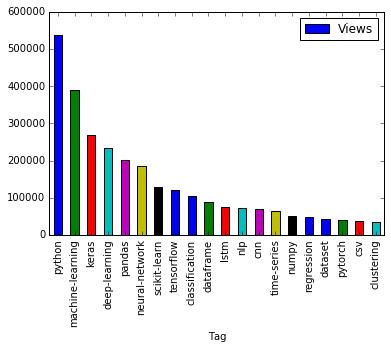

In [12]:
%matplotlib inline
tv = top_viewed.plot.bar(x="Tag", y="Views")

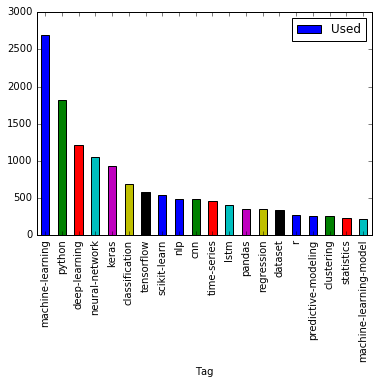

In [13]:
tu = top_used.plot.bar(x="Tag", y="Used")

* Yes, I know what most of the tags in common mean
* Yes, there are strong relations between many of them

In [14]:
all_qs = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_qs.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [15]:
def transform_tags(tagstring):
    tag = tagstring.replace("><", ",")
    tag = tag.replace("<","")
    tag = tag.replace(">","")
    return tag.split(',')

all_qs['Tags'] = all_qs['Tags'].apply(transform_tags)

In [16]:
def is_deep_learning(tags):
    if 'deep-learning' in tags:
        return True
    return False

all_qs['IsDeepLearning'] = all_qs['Tags'].apply(is_deep_learning) 

In [18]:
all_qs['yearmonth'] = all_qs['CreationDate'].apply(lambda x: int(x.strftime("%Y%m")))

In [21]:
deep_learning_qs = all_qs[all_qs["IsDeepLearning"] == True].groupby(by="yearmonth").count()

In [26]:
deep_learning_qs.drop(["Id", "CreationDate", "Tags"], axis=1, inplace=True)

In [28]:
total_qs = all_qs.groupby(by="yearmonth").count()
total_qs.drop(["Id","CreationDate","IsDeepLearning"], axis=1, inplace=True)
total_qs.rename(columns={"Tags": "Total Questions"}, inplace=True)

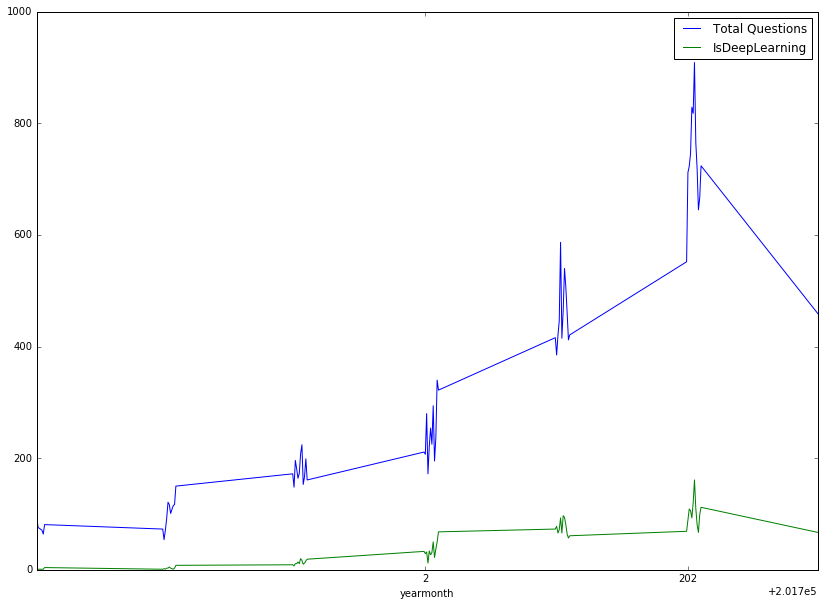

In [40]:
qs = total_qs.merge(deep_learning_qs, left_index=True, right_index=True)
qs.plot.line(xticks=[201902,201702],figsize=(14,10))

Observations:
    Deep Learning questions have increased recently in popularity.
    Might be worth investing more content in
    Python and Machine Learning appear to be the most popular between all questions and views

Final Recommendation:  Pursue further content in Python and Machine Learning with some touches upon Deep Learning.